# A Spatial Analysis of the new covid cases in Saudi Arabia on the 5th of March, 2020.

### All the data comes from the daily report from the Ministry of Health

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import csv
row_list = [[ "Region", "Num of Cases"],
             [ "Riyadh", 187],
             [ "Makkah", 55],
             [ "Dammam", 68],
             [ "Tabuk", 24],
             [ "Medina", 10],
             ["Buraydah", 9],
             ["Hail", 6],
             ["Abha", 5],
             ["Najran", 5],
             ["Arar", 5],
             ["Jazan", 3],
             ["Al Bahah", 1],
             ["Al Jowf", 7]

            ]
                
with open('covid.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)

In [3]:
df= pd.read_csv('covid.csv')
df.head(10)

,Region,Num of Cases
0,Riyadh,187
1,Makkah,55
2,Dammam,68
3,Tabuk,24
4,Medina,10
5,Buraydah,9
6,Hail,6
7,Abha,5
8,Najran,5
9,Arar,5


In [4]:
locations=pd.DataFrame({"Name":df['Region'].unique()})

In [5]:
locations

,Name
0,Riyadh
1,Makkah
2,Dammam
3,Tabuk
4,Medina
5,Buraydah
6,Hail
7,Abha
8,Najran
9,Arar


In [6]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent="app")
lat=[]
lon=[]
for location in locations['Name']:
    location = geolocator.geocode(location)    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [7]:
locations['lat']=lat
locations['lon']=lon

In [8]:
locations 

,Name,lat,lon
0,Riyadh,24.638916,46.716010
1,Makkah,21.420847,39.826869
2,Dammam,26.436782,50.103999
3,Tabuk,28.325187,37.632865
4,Medina,29.283628,-99.112683
5,Buraydah,26.331667,43.971667
6,Hail,26.992099,41.489258
7,Abha,18.216428,42.504360
8,Najran,18.000000,45.666667
9,Arar,30.916667,41.500000


In [9]:
locations.to_csv('covid_locations.csv',index=False)

##### I had to change some of the values manually since Geopy didn't get them correctly

In [21]:
locations = pd.read_csv('covid_locations.csv')
locations

,Name,lat,lon
0,Riyadh,24.638916,46.716010
1,Makkah,21.420847,39.826869
2,Dammam,25.436782,50.103999
3,Tabuk,28.325187,37.632865
4,Medina,24.283628,39.112683
5,Buraydah,26.331667,43.971667
6,Hail,26.992099,41.489258
7,Abha,18.216428,42.504360
8,Najran,18.000000,45.666667
9,Arar,30.916667,41.500000


In [22]:
df.rename(columns={"Region":"Name"},inplace=True)

In [23]:
locations=locations.merge(df,on='Name',how="left")
locations

,Name,lat,lon,Num of Cases
0,Riyadh,24.638916,46.716010,187
1,Makkah,21.420847,39.826869,55
2,Dammam,25.436782,50.103999,68
3,Tabuk,28.325187,37.632865,24
4,Medina,24.283628,39.112683,10
5,Buraydah,26.331667,43.971667,9
6,Hail,26.992099,41.489258,6
7,Abha,18.216428,42.504360,5
8,Najran,18.000000,45.666667,5
9,Arar,30.916667,41.500000,5


In [24]:
def generateBaseMap(default_location=[23.28, 44.59], default_zoom_start=5.2):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [25]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [26]:
basemap

In [27]:
locations[['lat','lon','Num of Cases']]

,lat,lon,Num of Cases
0,24.638916,46.716010,187
1,21.420847,39.826869,55
2,25.436782,50.103999,68
3,28.325187,37.632865,24
4,24.283628,39.112683,10
5,26.331667,43.971667,9
6,26.992099,41.489258,6
7,18.216428,42.504360,5
8,18.000000,45.666667,5
9,30.916667,41.500000,5


In [28]:
HeatMap(locations[['lat','lon','Num of Cases']],zoom=20,radius=15).add_to(basemap)

In [29]:
basemap

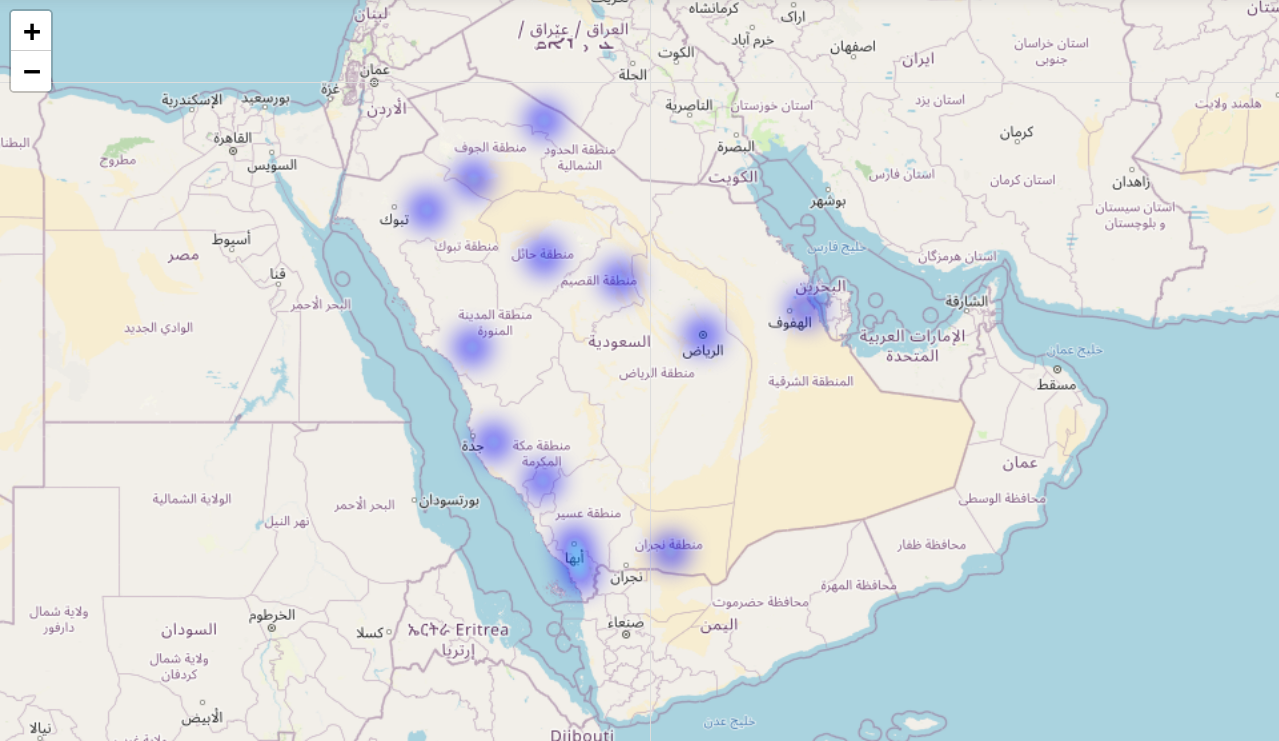

In [30]:
from IPython.display import display
from PIL import Image


path="/home/moe/Pictures/Screenshot from 2021-03-06 04-13-39.png"
display(Image.open(path))